# Sensor corrections

Apply sensor corrections to raw core-scan image and convert to radiance using white and dark references.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import hylite
import hylite.io as io
from hylite.sensors import Fenix

## Select images to process

In [6]:
# link to folder containing Fenix data
paths = [
    '/Users/thiele67/Documents/Data/CA/Scanner/white_panel/batch 1_orientation2_whitepanel_CA 2019_0035_CA2019_5_5m00_6m00',
    # add more files here if need be
]

In [7]:
# save reflectance files here
outdir = '/Users/thiele67/Documents/Data/CA/Scanner/white panel/reflectance/'

## Apply sensor corrections

In [8]:
# chose the calibration target that was used to correct the data
from hylite.reference.spectra import R90 as white #white panel
from hylite.reference.spectra import R55_SiSu as grey # grey panel

Fenix.set_white_ref_spectra( white ) # choose the panel that was used to aquire the scans

In [9]:
# apply sensor corrections to images
images = [ Fenix.correct_folder( p, 
                                flip = True, # set flip to True if camera was mounted backwards (incorrect lens corr)
                                shift = False, # set to true to correct for spatial shift between VNIR and SWIR
                                verbose=True ) for p in paths ]


Loading image /Users/thiele67/Documents/Data/CA/Scanner/white_panel/batch 1_orientation2_whitepanel_CA 2019_0035_CA2019_5_5m00_6m00/capture/CA 2019_0035_CA2019_5_5m00_6m00.hdr
Converting to radiance... DONE.
Filtering bad pixels... DONE.
Applying lens correction... DONE.


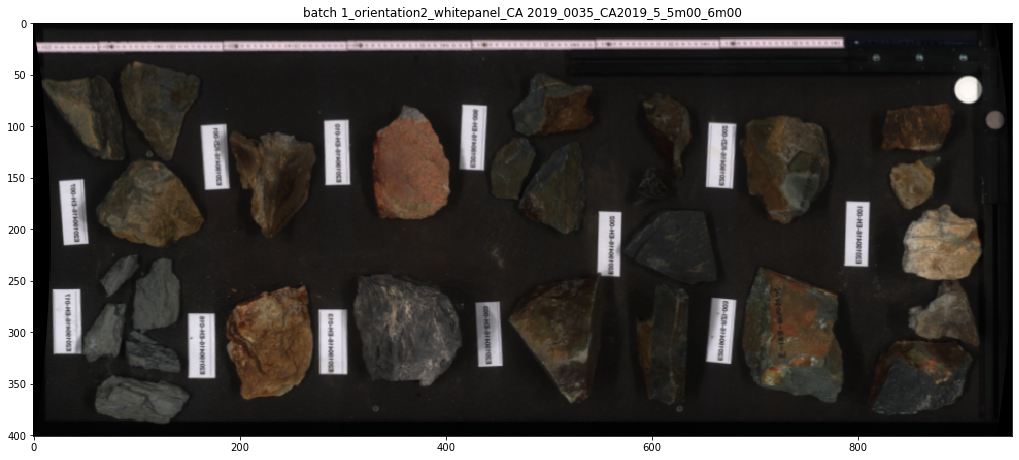

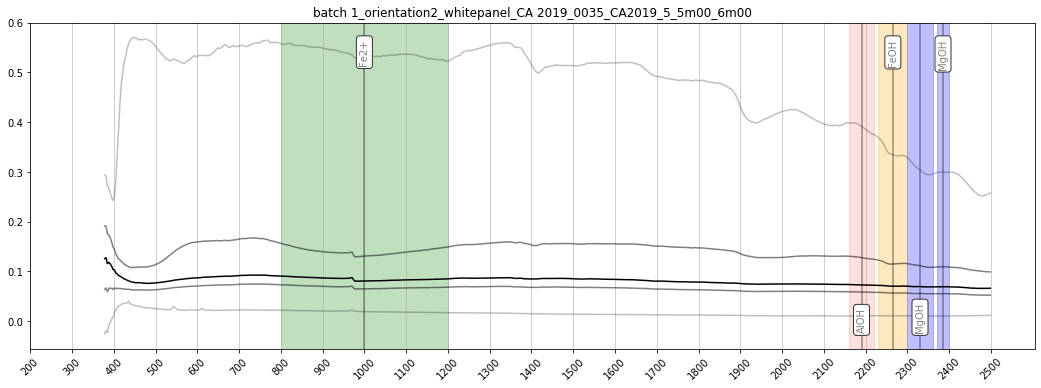

In [10]:
# plot preview
for i,image in enumerate(images):
    fig,ax = image.quick_plot( hylite.RGB )
    ax.set_title( os.path.basename( paths[i] ) )
    fig.show()
                 
    fig, ax = image.plot_spectra()
    ax.set_title( os.path.basename( paths[i] ) )
    fig.show()

## Save reflectance images

In [ ]:
#specify output directory
for i,image in enumerate(images):
    outpath = os.path.join(outdir, os.path.basename(paths[i])+"_refl.hdr")
    io.saveWithGDAL(outpath, image)